# Auction experiment

Change the auction method or the valuation function below and re-run the cells to see how allocation changes.

In [1]:
import os
os.chdir('../')  # Change to the parent directory

from typing import List

from sim.ad_auction import AdSpot, Bidder

# Auction parameters
method = 'gsp'  # choose from 'first_price', 'second_price', 'gsp'
# mechanism = 'efficiency-max'  # choose from 'efficiency-max', 'EQ-constrained'
# mechanism = 'stat_parity_constrained'  # choose from 'efficiency-max', 'EQ-constrained', 'stat_parity_constrained'
mechanism = 'EQ_constrained'  # choose from 'efficiency-max', 'EQ-constrained', 'stat_parity_constrained', 'fairness_constrained'
n_impressions = 200000
seed = 97
positive_bidder = 'STEM'  # bidder treated as the positive/high-stakes outcome

underexposed_group = 'female'  # group to be favored in fairness-constrained mechanism

# Configure bidder valuations (bids) per group; edit these dictionaries as desired
BIDDER_TARGETING = {
    'Makeup': {'female': 10.0, 'male': 2.0},
    'STEM': {'female': 1.0, 'male': 1.0},
}

# Configure ad quality scores per group and bidder (used as CTR proxies)
QUALITY_BY_GROUP = {
    'female': {'Makeup': 0.5, 'STEM': 0.8},
    'male': {'Makeup': 0.1, 'STEM': 1.0},
}
# BIDDER_TARGETING = {
#     'Makeup': {'female': 10.0, 'male': 2.0},
#     'STEM': {'female': 5.0, 'male': 0.2},
# }

# # Configure ad quality scores per group and bidder (used as CTR proxies)
# QUALITY_BY_GROUP = {
#     'female': {'Makeup': 0.5, 'STEM': 1.0},
#     'male': {'Makeup': 0.1, 'STEM': 1.0},
# }

ratio = QUALITY_BY_GROUP['female'][positive_bidder] / QUALITY_BY_GROUP['male'][positive_bidder]
FAIRNESS_CONSTRAINT = {
    'type': 'stat_parity',
    'params': {
        'underexposed_group': underexposed_group,
        'ratio': ratio,
    }
}
tie_cfg = {'p_stem_female': 0.3,
           'stem_quality_ratio': ratio}

# You can replace custom_valuation's body with your own function
def custom_valuation(bidder: Bidder, adspot: AdSpot, ctrs: List[float]) -> float:
    return bidder.targeting.get(adspot.tags[0], 0.0)


In [2]:
# Run the simulation
from experiments.experiment_gender_allocation import run_simulations, print_summary
results = run_simulations(
    n_impressions=n_impressions,
    methods=[method],
    seed=seed,
    valuation_fn=custom_valuation,
    bidder_configs=BIDDER_TARGETING,
    quality_by_group=QUALITY_BY_GROUP,
    positive_bidder_name=positive_bidder,
    mechanism=mechanism,
    underexposed_group=underexposed_group,
    tie_break_config=tie_cfg,
)
print_summary(results)


quality stem: {'female': 0.8, 'male': 1.0}
positive rates: {'male': 0.239168422419044, 'female': 0.2992799415140256}

Method: gsp
Total impressions: 200000
Average price per impression: 2.465
Total spend by bidder:
  Makeup: 146164.00
  STEM: 346744.00
Impressions for female: 99853
  Makeup: 69969 (70.07%)
  STEM: 29884 (29.93%)
Impressions for male: 100147
  Makeup: 76195 (76.08%)
  STEM: 23952 (23.92%)
---------------------------
---------------------------
---------------------------
---------------------------
Fairness metrics:
Statistical parity (share receiving STEM):
  male: 23.92%
  female: 29.93%
  Max gap: 6.01%
---------------------------
---------------------------
Equality of Opportunity (adjusted rates):
  female: 29.93%
  female_adjusted: 29.90%
  Max gap: 0.03% (EQ respected)
---------------------------
---------------------------
Total platform utility (revenue): 492908.00


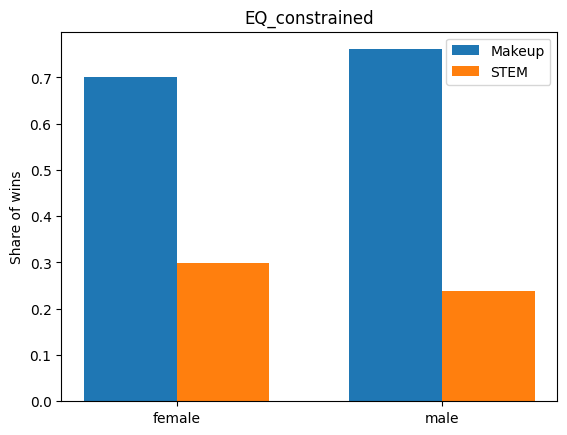

In [3]:
# Plot results inline (requires matplotlib)
from experiments.experiment_gender_allocation import try_plot
try_plot(results, "EQ_constrained")


In [4]:
# try same scenario with statistical parity constraint
mechanism = 'stat_parity_constrained'
results_sp = run_simulations(
    n_impressions=n_impressions,
    methods=[method],
    seed=seed,
    valuation_fn=custom_valuation,
    bidder_configs=BIDDER_TARGETING,
    quality_by_group=QUALITY_BY_GROUP,
    positive_bidder_name=positive_bidder,
    mechanism=mechanism,
    underexposed_group=underexposed_group,
    tie_break_config=tie_cfg,
)
print_summary(results_sp)

quality stem: {'female': 0.8, 'male': 1.0}
positive rates: {'male': 0.5002246697354888, 'female': 0.5019378486374971}

Method: gsp
Total impressions: 200000
Average price per impression: 3.506
Total spend by bidder:
  STEM: 601392.00
  Makeup: 99784.00
Impressions for female: 99853
  STEM: 50120 (50.19%)
  Makeup: 49733 (49.81%)
Impressions for male: 100147
  STEM: 50096 (50.02%)
  Makeup: 50051 (49.98%)
---------------------------
---------------------------
---------------------------
---------------------------
Fairness metrics:
Statistical parity (share receiving STEM):
  male: 50.02%
  female: 50.19%
  Max gap: 0.17%
---------------------------
---------------------------
Equality of Opportunity (adjusted rates):
  female: 50.19%
  female_adjusted: 62.53%
  Max gap: 12.33% (EQ NOT respected)
---------------------------
---------------------------
Total platform utility (revenue): 701176.00


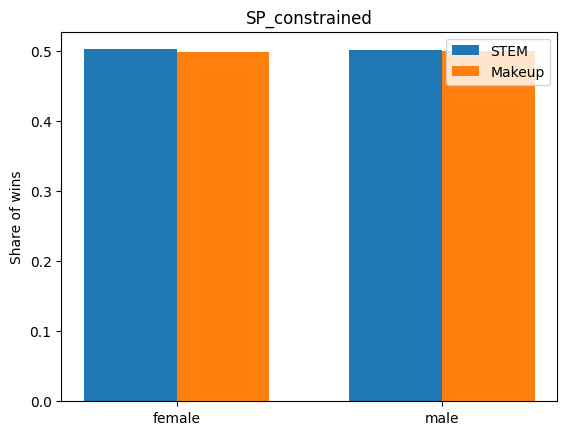

In [5]:
# Plot results inline (requires matplotlib)
try_plot(results_sp, "SP_constrained")

In [6]:
# try same scenario with efficiency maximization
mechanism = 'efficiency-max'
results_em = run_simulations(
    n_impressions=n_impressions,
    methods=[method],
    seed=seed,
    valuation_fn=custom_valuation,
    bidder_configs=BIDDER_TARGETING,
    quality_by_group=QUALITY_BY_GROUP,
    positive_bidder_name=positive_bidder,
    mechanism=mechanism,
    underexposed_group=underexposed_group,
    tie_break_config=tie_cfg,
)
print_summary(results_em)

quality stem: {'female': 0.8, 'male': 1.0}
positive rates: {'male': 1.0, 'female': 0.0}

Method: gsp
Total impressions: 200000
Average price per impression: 1.501
Total spend by bidder:
  STEM: 200294.00
  Makeup: 99853.00
Impressions for female: 99853
  Makeup: 99853 (100.00%)
Impressions for male: 100147
  STEM: 100147 (100.00%)
---------------------------
---------------------------
---------------------------
---------------------------
Fairness metrics:
Statistical parity (share receiving STEM):
  male: 100.00%
  female: 0.00%
  Max gap: 100.00%
---------------------------
---------------------------
Equality of Opportunity (adjusted rates):
  female: 0.00%
  female_adjusted: 125.00%
  Max gap: 125.00% (EQ NOT respected)
---------------------------
---------------------------
Total platform utility (revenue): 300147.00


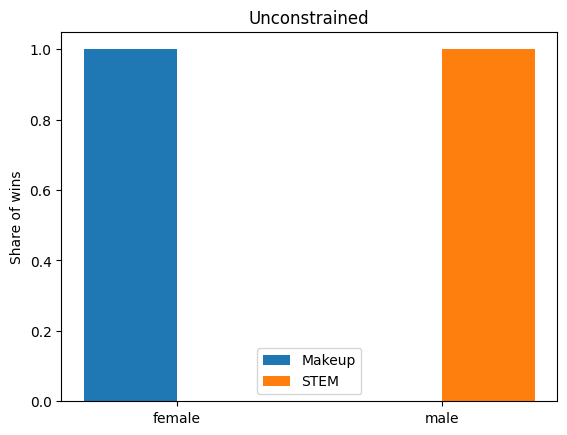

In [7]:
# plot results inline (requires matplotlib)
try_plot(results_em, "Unconstrained")

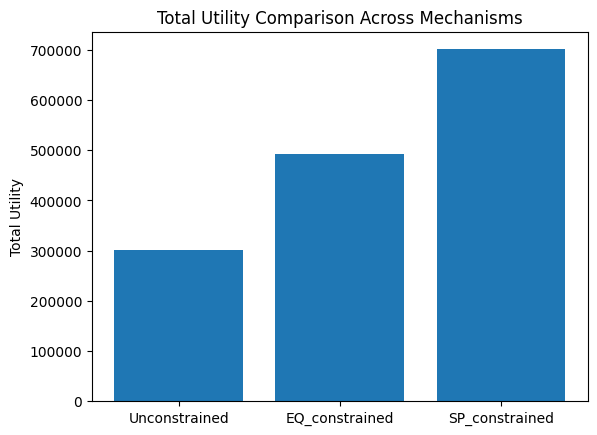

In [12]:
#compare revenue across mechanisms
# build a simple comparison plot
import matplotlib.pyplot as plt
mechanisms = ['Unconstrained', 'EQ_constrained', 'SP_constrained']
revenues = [
    results_em[method]['total_utility'],
    results[method]['total_utility'],
    results_sp[method]['total_utility'],
]
plt.bar(mechanisms, revenues)
plt.ylabel('Total Utility')
plt.title('Total Utility Comparison Across Mechanisms')
plt.show()

['Makeup', 'STEM']


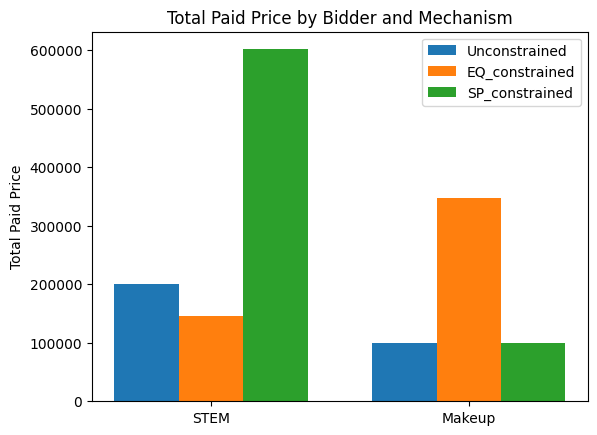

In [17]:
# compare price total paid price for each bidder across mechanisms
import numpy as np
bidders = list(BIDDER_TARGETING.keys())
print(bidders)
#invert keys
bidders = [bidders[1], bidders[0]]
x = np.arange(len(bidders))  # the label locations
width = 0.25  # the width of the bars   
fig, ax = plt.subplots()
rects1 = ax.bar(x - width,
                [s for b, s in results_em[method]['total_spend'].items()],
                width, label='Unconstrained')
rects2 = ax.bar(x,
                [s for b, s in results[method]['total_spend'].items()],
                width, label='EQ_constrained')
rects3 = ax.bar(x + width,
                [s for b, s in results_sp[method]['total_spend'].items()],
                width, label='SP_constrained')
ax.set_ylabel('Total Paid Price')
ax.set_title('Total Paid Price by Bidder and Mechanism')
ax.set_xticks(x)
ax.set_xticklabels(bidders)
ax.legend() 
plt.show()